**OLA Data Analysis**

**Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [3]:
df = pd.read_excel(r"C:\Users\Admin\Downloads\OLA_DataSet.xlsx")

**Data Info**

In [4]:
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,NaN
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,NaN
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,NaN
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,NaN
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,NaN


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        103024 non-null  datetime64[ns]
 1   Time                        103024 non-null  object        
 2   Booking_ID                  103024 non-null  object        
 3   Booking_Status              103024 non-null  object        
 4   Customer_ID                 103024 non-null  object        
 5   Vehicle_Type                103024 non-null  object        
 6   Pickup_Location             103024 non-null  object        
 7   Drop_Location               103024 non-null  object        
 8   V_TAT                       63967 non-null   float64       
 9   C_TAT                       63967 non-null   float64       
 10  Canceled_Rides_by_Customer  10499 non-null   object        
 11  Canceled_Rides_by_Driver    18434 non-n

In [10]:
print('size of data:',df.shape)

size of data: (103024, 20)


**Data Cleaning**

In [11]:
print(df['Canceled_Rides_by_Customer'].unique())

[nan 'Driver is not moving towards pickup location'
 'Driver asked to cancel' 'AC is Not working' 'Change of plans'
 'Wrong Address']


In [12]:
df['Canceled_Rides_by_Customer'] = df['Canceled_Rides_by_Customer'].fillna('Not_cancelled_by_customer')

In [13]:
print(df['Canceled_Rides_by_Driver'].unique())

['Personal & Car related issue' nan 'Customer was coughing/sick'
 'Customer related issue' 'More than permitted people in there']


In [14]:
df['Canceled_Rides_by_Driver'] = df['Canceled_Rides_by_Driver'].fillna('Not_cancelled_by_driver')

In [15]:
print(df['Canceled_Rides_by_Driver'].unique())

['Personal & Car related issue' 'Not_cancelled_by_driver'
 'Customer was coughing/sick' 'Customer related issue'
 'More than permitted people in there']


In [16]:
df['Incomplete_Rides'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [17]:
df['Incomplete_Rides'] = df['Incomplete_Rides'].fillna('Not_mentioned')

In [18]:
df['Incomplete_Rides'].unique()

array(['Not_mentioned', 'No', 'Yes'], dtype=object)

In [19]:
df['Driver_Ratings'] = df['Driver_Ratings'].fillna(0)

In [20]:
df['Customer_Rating'] = df['Customer_Rating'].fillna(0)

In [21]:
df['V_TAT'] = df['V_TAT'].fillna(0)

In [22]:
df['C_TAT'] = df['C_TAT'].fillna(0)

In [23]:
df['Incomplete_Rides_Reason'].unique()

array([nan, 'Customer Demand', 'Vehicle Breakdown', 'Other Issue'],
      dtype=object)

In [24]:
df['Incomplete_Rides_Reason'] = df['Incomplete_Rides_Reason'].fillna('Not_mentioned')

In [25]:
df['Payment_Method']=df['Payment_Method'].fillna('Not_mentioned')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        103024 non-null  datetime64[ns]
 1   Time                        103024 non-null  object        
 2   Booking_ID                  103024 non-null  object        
 3   Booking_Status              103024 non-null  object        
 4   Customer_ID                 103024 non-null  object        
 5   Vehicle_Type                103024 non-null  object        
 6   Pickup_Location             103024 non-null  object        
 7   Drop_Location               103024 non-null  object        
 8   V_TAT                       103024 non-null  float64       
 9   C_TAT                       103024 non-null  float64       
 10  Canceled_Rides_by_Customer  103024 non-null  object        
 11  Canceled_Rides_by_Driver    103024 non-

**Save the cleaned file**

In [22]:
df.to_excel('Ola_cleaned_dataset.xlsx', index = False)

In [57]:
df.to_csv('Ola_cleaned_datas.csv', index = False)

conn = sqlite3.connect("ola_data.db")
df = pd.read_excel(r"C:\Users\Admin\Downloads\Ola_cleaned_dataset.xlsx")
df.to_sql('ola', con = conn, if_exsists = 'replace', index = False)


**Visualization**

In [6]:
count = df["Booking_Status"].value_counts()
count

Booking_Status
Success                 63967
Canceled by Driver      18434
Canceled by Customer    10499
Driver Not Found        10124
Name: count, dtype: int64

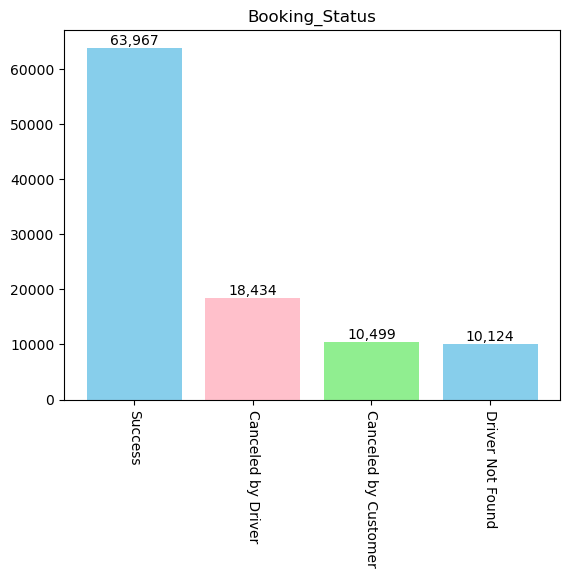

In [15]:
bars = plt.bar(count.index, count, color = {'skyblue','pink','lightgreen'})
plt.xticks(rotation = -90)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() /2, bar.get_height(),f'{bar.get_height():,.0f}', ha = 'center', va = 'bottom')
plt.title('Booking_Status')    
plt.show()

In [16]:
count2 = df['Vehicle_Type'].value_counts()
count2

Vehicle_Type
Prime Sedan    14877
eBike          14816
Auto           14755
Prime Plus     14707
Bike           14662
Prime SUV      14655
Mini           14552
Name: count, dtype: int64

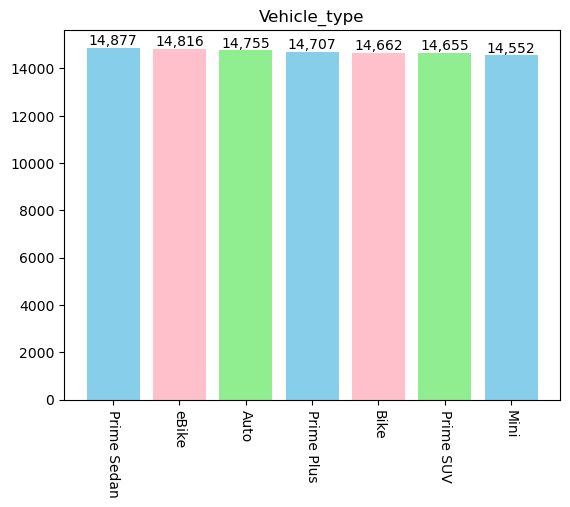

In [17]:
bars1 = plt.bar(count2.index, count2, color = {'skyblue','pink','lightgreen'})
plt.xticks(rotation = -90)

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() /2, bar.get_height(),f'{bar.get_height():,.0f}', ha = 'center', va = 'bottom')
plt.title('Vehicle_type')    
plt.show()

In [18]:
count3 = df['Payment_Method'].value_counts()
count3

Payment_Method
Cash           35022
UPI            25881
Credit Card     2435
Debit Card       629
Name: count, dtype: int64

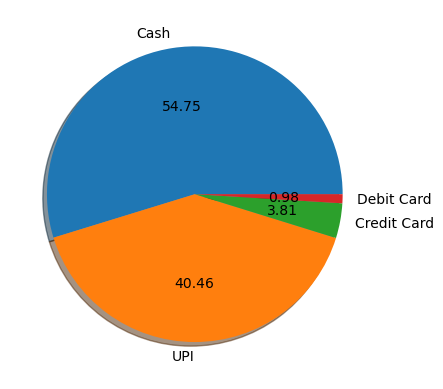

In [43]:
plt.pie(count3, labels = count3.index, autopct = "%1.2f",shadow = True)
plt.show()

In [28]:
sum_rides = df.groupby('Vehicle_Type')['Ride_Distance'].sum()
sum_rides

Vehicle_Type
Auto            92043
Bike           227746
Mini           225703
Prime Plus     227186
Prime SUV      223848
Prime Sedan    234535
eBike          230842
Name: Ride_Distance, dtype: int64

In [33]:
avg_rides =  df.groupby('Vehicle_Type')['Ride_Distance'].mean()
avg_rides

Vehicle_Type
Auto            6.238089
Bike           15.533079
Mini           15.510102
Prime Plus     15.447474
Prime SUV      15.274514
Prime Sedan    15.764939
eBike          15.580589
Name: Ride_Distance, dtype: float64

In [34]:
#average customer rating based on vehicle type
avg_rating =  df.groupby('Vehicle_Type')['Customer_Rating'].mean()
avg_rating

Vehicle_Type
Auto           3.998811
Bike           3.993376
Mini           3.997731
Prime Plus     4.009499
Prime SUV      3.999378
Prime Sedan    4.001589
eBike          3.987854
Name: Customer_Rating, dtype: float64

In [38]:
# average driver ratings based on vehicle type
avg_rating2 =  df.groupby('Vehicle_Type')['Driver_Ratings'].mean()
avg_rating2

Vehicle_Type
Auto           4.003938
Bike           3.984651
Mini           3.992807
Prime Plus     3.997785
Prime SUV      4.005780
Prime Sedan    3.990681
eBike          4.006743
Name: Driver_Ratings, dtype: float64

In [27]:
df['Incomplete_Rides'].unique()

array(['Not_mentioned', 'No', 'Yes'], dtype=object)

In [29]:
df2 = pd.read_excel(r"C:\Users\Admin\Downloads\Ola_cleaned_dataset.xlsx")

In [30]:
df2.head()

,Date_s,Time_s,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,0,0,Not_cancelled_by_customer,Personal & Car related issue,canceled_by_driver,Not_mentioned,444,Not_mentioned,0,0.0,0.0
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203,30,Not_cancelled_by_customer,Not_cancelled_by_driver,No,Not_mentioned,158,Cash,13,4.1,4.0
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238,130,Not_cancelled_by_customer,Not_cancelled_by_driver,No,Not_mentioned,386,UPI,40,4.2,4.8
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,0,0,Driver is not moving towards pickup location,Not_cancelled_by_driver,canceled_by_customer,Not_mentioned,384,Not_mentioned,0,0.0,0.0
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252,80,Not_cancelled_by_customer,Not_cancelled_by_driver,No,Not_mentioned,822,Credit Card,45,4.0,3.0


In [32]:
df2['Incomplete_Rides'].unique()

array(['canceled_by_driver', 'No', 'canceled_by_customer',
       'Not_mentioned', 'Yes'], dtype=object)

In [35]:
df2['Incomplete_Rides'].value_counts()

Incomplete_Rides
No                      60041
canceled_by_driver      18434
canceled_by_customer    10499
Not_mentioned           10124
Yes                      3926
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_9576\564052591.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d.set_xticklabels(d.get_xticklabels(),rotation = -90)


[Text(0, 0, 'canceled_by_driver'),
 Text(1, 0, 'No'),
 Text(2, 0, 'canceled_by_customer'),
 Text(3, 0, 'Not_mentioned'),
 Text(4, 0, 'Yes')]

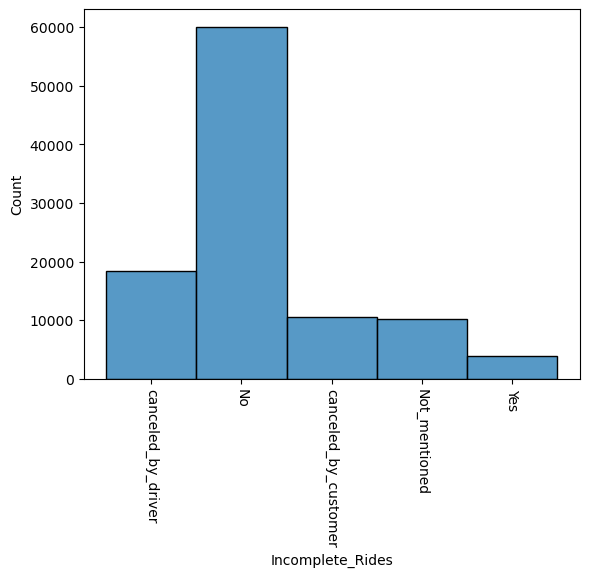

In [39]:
d= sns.histplot(data= df2, x= 'Incomplete_Rides')
d.set_xticklabels(d.get_xticklabels(),rotation = -90)

In [40]:
df2['Canceled_Rides_by_Customer'].value_counts()

Canceled_Rides_by_Customer
Not_cancelled_by_customer                       92525
Driver is not moving towards pickup location     3175
Driver asked to cancel                           2670
Change of plans                                  2081
AC is Not working                                1568
Wrong Address                                    1005
Name: count, dtype: int64

In [41]:
df2['Canceled_Rides_by_Driver'].value_counts()

Canceled_Rides_by_Driver
Not_cancelled_by_driver                84590
Personal & Car related issue            6542
Customer related issue                  5413
Customer was coughing/sick              3654
More than permitted people in there     2825
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_9576\644571582.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(f.get_xticklabels(),rotation = -90)


[Text(0, 0, 'Canceled by Driver'),
 Text(1, 0, 'Success'),
 Text(2, 0, 'Canceled by Customer'),
 Text(3, 0, 'Driver Not Found')]

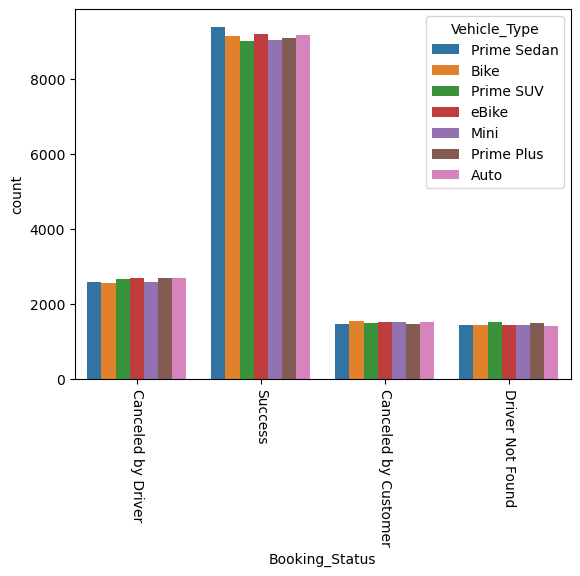

In [75]:
f = sns.countplot(data=df2, x= 'Booking_Status', hue='Vehicle_Type')
f.set_xticklabels(f.get_xticklabels(),rotation = -90)

<Axes: xlabel='Ride_Distance', ylabel='Density'>

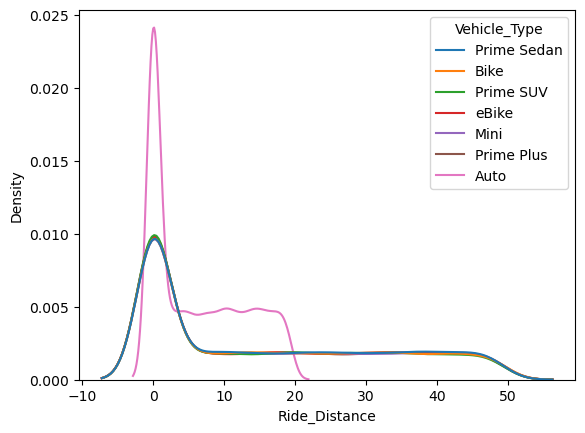

In [46]:
sns.kdeplot(data = df2, x= 'Ride_Distance', hue = 'Vehicle_Type')

<Axes: xlabel='Customer_Rating', ylabel='Density'>

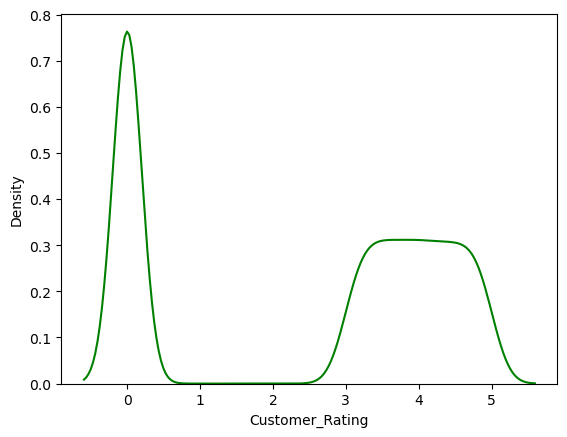

In [56]:
sns.kdeplot(data = df2, x= 'Customer_Rating', color = 'green')


In [60]:
df2['Customer_Rating'] += (df2['Driver_Ratings']-4.0)*0.3

In [63]:
h = df2['Customer_Rating'].clip(lower = 3.0, upper = 5.0)
h

0         3.00
1         4.03
2         4.86
3         3.00
4         3.00
          ... 
103019    3.68
103020    3.39
103021    3.08
103022    3.00
103023    4.64
Name: Customer_Rating, Length: 103024, dtype: float64

In [65]:
k = df2['Driver_Ratings'].clip(lower = 3.0, upper = 5.0)
k

0         3.0
1         4.1
2         4.2
3         3.0
4         4.0
         ... 
103019    3.6
103020    4.3
103021    3.6
103022    3.4
103023    4.8
Name: Driver_Ratings, Length: 103024, dtype: float64

<Axes: xlabel='Customer_Rating', ylabel='Driver_Ratings'>

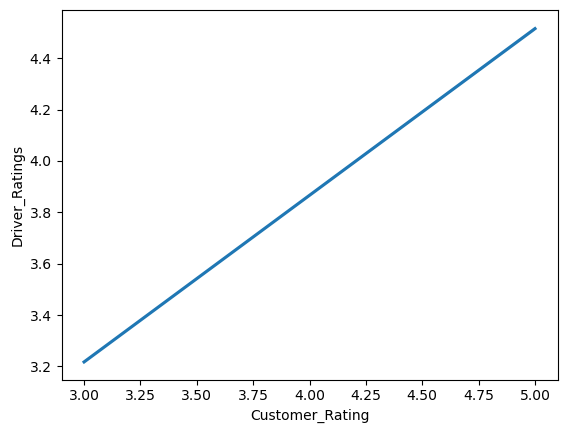

In [68]:
sns.regplot(data= df2, x=h, y = k, scatter = False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9576\3662512843.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df2, x = 'Vehicle_Type', y = 'Ride_Distance', palette = 'Set3')


<Axes: xlabel='Vehicle_Type', ylabel='Ride_Distance'>

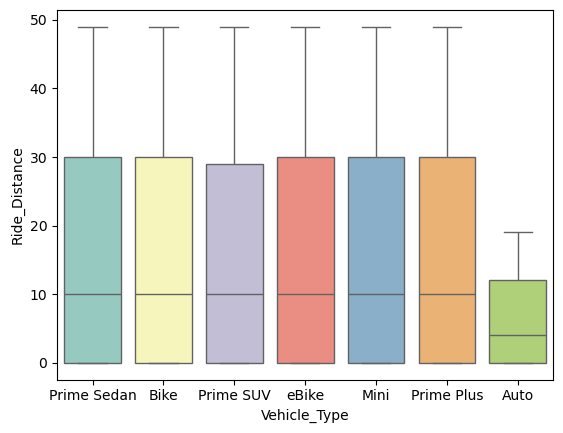

In [70]:
sns.boxplot(data = df2, x = 'Vehicle_Type', y = 'Ride_Distance', palette = 'Set3')